In [1]:
# import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read imputed csv file
dfx = pd.read_csv('../csv_files/x.csv', index_col=0)
dfx.head()

,C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3,C3p,C5p,C2
0,122.0,3.43,0.029074,40962052.0,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0,0,3.864345,1.0
1,259.0,-1.62,-0.013352,28869196.0,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0,1,12.028832,0.0
2,90.0,-1.24,0.020715,16845668.0,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0,1,3.369134,1.0
3,209.0,-0.91,0.020023,14848637.0,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0,1,3.299697,1.0
4,80.0,0.07,-0.034895,30741716.0,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0,0,3.726269,1.0


In [3]:
# Define Long Sentences
def LongSentences(row):
    return row['T4']/row['T1']
    
# add a new column with the values returned from the previous function
dfx['LongSentences'] = dfx.apply(lambda row: LongSentences(row),axis=1)

In [4]:
# Define Real Words
def RealWords(row):
    if row['T2'] == 0 :
        return 0
    else: 
        return row['T3']/row['T2']

# add a new column with the values returned from the previous function
dfx['RealWords'] = dfx.apply(lambda row: RealWords(row),axis=1)

In [5]:
# Define Long Words
def LongWords(row):
    if row['T2'] == 0 :
        return 0
    else: 
        return row['T5']/row['T2']
    
# add a new column with the values returned from the previous function
dfx['LongWords'] = dfx.apply(lambda row: LongWords(row),axis=1)

In [6]:
# Define Positive Words
def PositiveWords(row):
    if row['T2'] == 0 :
        return 0
    else: 
        return row['S1']/row['T2']
    
# add a new column with the values returned from the previous function
dfx['PositiveWords'] = dfx.apply(lambda row: PositiveWords(row),axis=1)

In [7]:
# Define Negative Words
def NegativeWords(row):
    if row['T2'] == 0 :
        return 0
    else: 
        return row['S2']/row['T2']
    
# add a new column with the values returned from the previous function
dfx['NegativeWords'] = dfx.apply(lambda row: NegativeWords(row),axis=1)

In [8]:
# Define Uncertain Words
def UncertainWords(row):
    if row['T2'] == 0 :
        return 0
    else: 
        return row['S3']/row['T2']
    
# add a new column with the values returned from the previous function
dfx['UncertainWords'] = dfx.apply(lambda row: UncertainWords(row),axis=1)

In [9]:
# examine skew of each column
# keep in mind we do not have to fix the skew of C2 or C3p because they are binary 
dfx.skew()

C1                 5.747573
C3                21.158769
C4                -0.491134
C5                13.659056
C6                12.613291
C7                12.348960
T1                 1.740888
T2                 1.640243
T3                 1.617719
T4                 1.420602
T5                12.772389
S1                 2.312775
S2                 3.737864
S3                 3.440281
C3p                0.147347
C5p               10.648354
C2                -2.123926
LongSentences      0.080198
RealWords         25.462577
LongWords         26.111003
PositiveWords     20.846816
NegativeWords     10.312128
UncertainWords    22.121919
dtype: float64

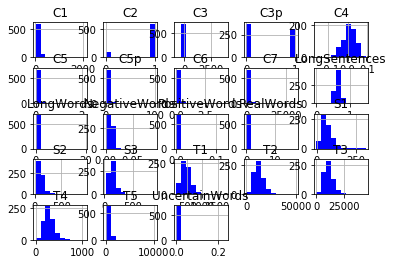

In [10]:
# examine distribution of each column
for col in dfx.columns:
    dfx.hist(color='blue')
    break
plt.show()

**Fixing Skewness of Columns**

In [11]:
dfx['C1'] = np.cbrt(np.sqrt(dfx['C1']))
dfx['C1'].skew()

0.9109395273429433

In [12]:
dfx['C3'] = np.log(abs(dfx['C3'])+1)
dfx['C3'].skew()

2.769743595961024

In [13]:
dfx['C5'] = np.log(dfx['C5'])
dfx['C5'].skew()

0.8059919965781625

In [14]:
dfx['C6'] = np.log(dfx['C6'])
dfx['C6'].skew()

0.6828713878358483

In [15]:
dfx['C7'] = np.cbrt(np.sqrt(dfx['C7']))
dfx['C7'].skew()

0.731374654601451

In [16]:
dfx['T1'] = np.sqrt(dfx['T1'])
dfx['T1'].skew()

0.6712438256338702

In [17]:
dfx['T2'] = np.sqrt(dfx['T2'])
dfx['T2'].skew()

0.25983595218650973

In [18]:
dfx['T3'] = np.sqrt(dfx['T3'])
dfx['T3'].skew()

0.17043776269434857

In [19]:
dfx['T4'] = np.sqrt(dfx['T4'])
dfx['T4'].skew()

0.1861355607469284

In [20]:
dfx['T5'] = np.sqrt(np.sqrt(abs(dfx['T5'])))
dfx['T5'].skew()

0.8101917406972015

In [21]:
dfx['S1'] = np.cbrt(dfx['S1'])
dfx['S1'].skew()

0.02578844451828221

In [22]:
dfx['S2'] = np.cbrt(np.sqrt(dfx['S2']))
dfx['S2'].skew()

0.65452033599648

In [23]:
dfx['S3'] = np.cbrt(np.sqrt(dfx['S3']))
dfx['S3'].skew()

0.421476978414795

In [24]:
#dfx['C3p'] = np.sqrt(dfx['C3p'])
#dfx['C3p'].skew()

In [25]:
dfx['C5p'] = np.log(dfx['C5p'])
dfx['C5p'].skew()

0.8253544249034355

In [26]:
#df['LongSentences'] = np.cbrt(df['LongSentences'])
#df['LongSentences'].skew()

In [27]:
dfx['RealWords'] = np.log((dfx['RealWords'])+1)
dfx['RealWords'].skew()

13.771794705352843

In [28]:
dfx['LongWords'] = np.sqrt(np.cbrt(abs(dfx['LongWords'])))
dfx['LongWords'].skew()

5.032662081268775

In [29]:
dfx['PositiveWords'] = np.cbrt(dfx['PositiveWords'])
dfx['PositiveWords'].skew()

1.2547010589897618

In [30]:
dfx['NegativeWords'] = np.cbrt(dfx['NegativeWords'])
dfx['NegativeWords'].skew()

0.02270002845854047

In [31]:
dfx['UncertainWords'] = np.cbrt(dfx['UncertainWords'])
dfx['UncertainWords'].skew()

3.2248104020483517

In [32]:
# check skew of columns 
# should be relatively normal (bell-shaped) or as close as possible 
dfx.skew()

C1                 0.910940
C3                 2.769744
C4                -0.491134
C5                 0.805992
C6                 0.682871
C7                 0.731375
T1                 0.671244
T2                 0.259836
T3                 0.170438
T4                 0.186136
T5                 0.810192
S1                 0.025788
S2                 0.654520
S3                 0.421477
C3p                0.147347
C5p                0.825354
C2                -2.123926
LongSentences      0.080198
RealWords         13.771795
LongWords          5.032662
PositiveWords      1.254701
NegativeWords      0.022700
UncertainWords     3.224810
dtype: float64

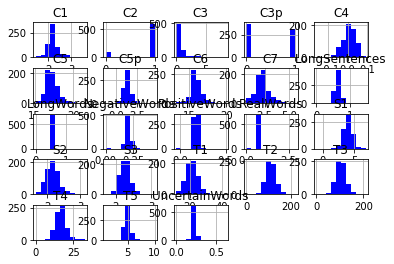

In [33]:
# visualize distribution of variables 
for col in dfx.columns:
    dfx.hist(color='blue')
    break
plt.show()

In [34]:
dfx.head()

,C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,...,S3,C3p,C5p,C2,LongSentences,RealWords,LongWords,PositiveWords,NegativeWords,UncertainWords
0,2.227033,1.488400,0.029074,17.528157,16.176365,1.927893,21.679483,112.778544,107.517440,17.349352,...,2.275984,0,1.351792,1.0,0.640426,0.646515,0.615270,0.169556,0.209529,0.221915
1,2.524740,0.963174,-0.013352,17.178286,14.690979,1.720483,28.124722,147.621137,139.946418,22.583180,...,2.487662,1,2.487306,0.0,0.644753,0.641182,0.609752,0.148247,0.223103,0.221556
2,2.116933,0.806476,0.020715,16.639604,15.424948,1.395264,14.177447,72.539644,69.173694,11.313708,...,1.978602,1,1.214656,1.0,0.636816,0.646763,0.628717,0.226322,0.184411,0.225078
3,2.436077,0.647103,0.020023,16.513419,15.319588,1.429303,18.110770,90.879040,87.028731,13.304135,...,2.188931,1,1.193831,1.0,0.539634,0.650793,0.628490,0.213167,0.192593,0.237040
4,2.075782,0.067659,-0.034895,17.241131,15.925724,2.929681,23.916521,121.778487,114.786759,18.330303,...,2.346674,0,1.315407,1.0,0.587413,0.635767,0.603993,0.165315,0.215782,0.224143


In [35]:
dfx.to_csv('../csv_files/p2no_skew.csv')